In [12]:
# Step 1: Import Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Step 2: Create/Connect to Database
conn = sqlite3.connect('sales_data.db')

# Step 3: Create Table & Insert Data
conn.execute('''CREATE TABLE IF NOT EXISTS sales (
                product TEXT, 
                quantity INTEGER, 
                price REAL)''')

In [14]:
# Step 4: Insert Sample Data
sample_data = [
    ('Widget', 15, 29.99),
    ('Gadget', 8, 49.99),
    ('Widget', 10, 29.99),
    ('Doodad', 20, 9.99),
    ('Gizmo', 5, 99.99),
    ('Gadget', 12, 49.99),
    ('Doodad', 25, 9.99),
    ('Widget', 8, 27.99),  
    ('Gizmo', 3, 105.99),
    ('Thingamajig', 18, 39.99)
]
conn.executemany('INSERT INTO sales VALUES (?,?,?)', sample_data)
conn.commit()

In [15]:
# Step 5: Run SQL Query
query = '''
    SELECT product, 
           SUM(quantity) AS total_units,
           SUM(quantity * price) AS revenue
    FROM sales 
    GROUP BY product
'''
df = pd.read_sql_query(query, conn)

In [16]:
# Step 6: Print Results
print("\nSales Summary:")
print(df.to_string(index=False))


Sales Summary:
    product  total_units  revenue
     Doodad          130  1298.70
     Gadget           56  2799.44
      Gizmo           16  1635.84
Thingamajig           36  1439.64
     Widget          116  3446.84


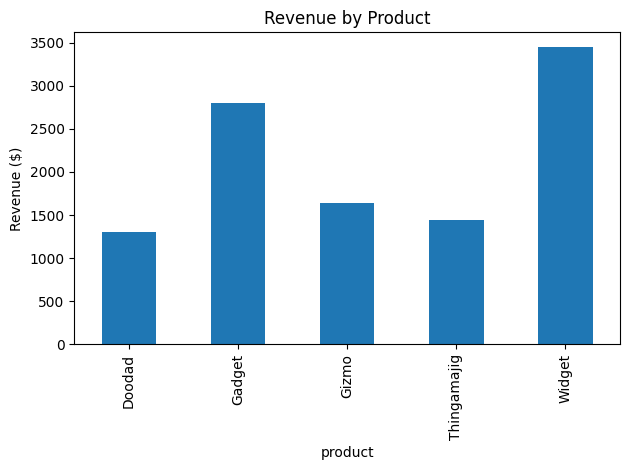

In [17]:
# Step 7: Generate Revenue by product(Bar Chart)
df.plot(kind='bar', x='product', y='revenue', 
        title='Revenue by Product', legend=False)
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig("Revenue by Product.png")
plt.show()

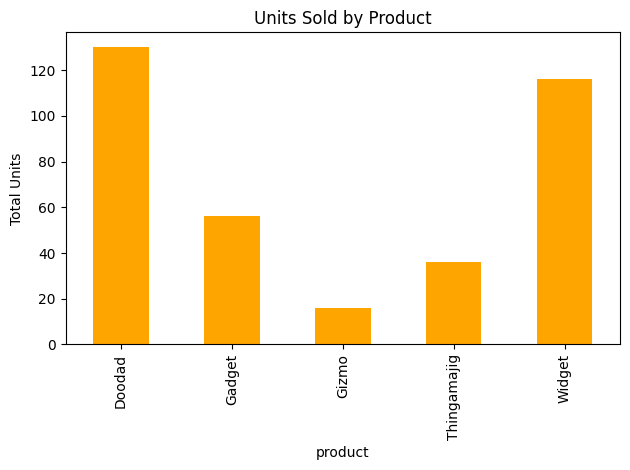

In [18]:
#Step 8: Generate Units Sold by Product (Bar Chart)
df.plot(kind='bar', x='product', y='total_units', 
        title='Units Sold by Product', legend=False, color='orange')
plt.ylabel('Total Units')
plt.tight_layout()
plt.savefig("units_sold_chart.png")
plt.show()

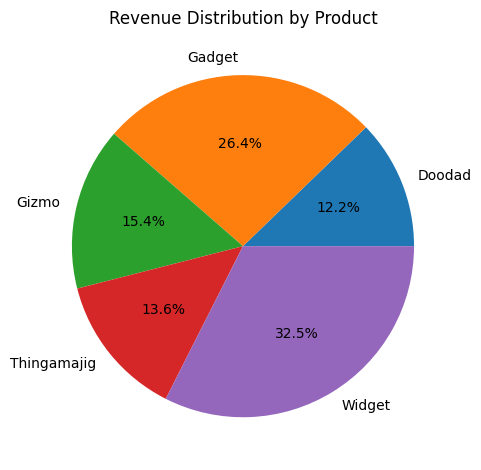

In [19]:
# Generate  Revenue Distribution (Pie Chart)
df.set_index('product')['revenue'].plot(
    kind='pie', 
    autopct='%1.1f%%', 
    title='Revenue Distribution by Product',
    ylabel=''
)
plt.tight_layout()
plt.savefig("revenue_pie_chart.png")
plt.show()